# Student Performance Prediction

trying to make a model that predicts a student's score based on some features. 
dataset: https://archive.ics.uci.edu/dataset/320/student+performance

will (attempt to) do this without much assistance. 

In [228]:
# importing libraries

import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

## Setting Up

In [224]:
# the set of features that i'll be working with
names = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3'] 

# reading the csv file + printing the first 5 examples
dataframe = pd.read_csv("data/student-por.csv", sep=";", usecols=names)
dataframe.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,11,13,13


In [225]:
# dataframe to numpy array
data = np.array(dataframe)

# separating the features (X) and targets (y)
X = data[:, 0:-1]
y = data[:, -1]

# number of training examples + number of features
m,n = X.shape


## Model

### Prediction

In [226]:
# setting up weights and bias

# random values to start
w = np.array([1] * n)
b = 100

In [227]:
# making a single prediction for testing

def predict(X,w,b): # here, x is just one training example/row of our data
    prediction = np.dot(X,w) + b
    return prediction

x_row = X[0,:]
p = predict(x_row,w,b)

print(p) # wow, so accurate

157


### Cost Function

now i will implement the cost function for multivariate linear regression using the equation below:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{1}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2}$$ 

using both of these equations, the cost with multiple variables can be computed

In [57]:
# now, rather than using a separate predict function, i'll just use np.dot() to calculate predictions

def cost_function(X,y,w,b): # this function takes all of the training examples
    cost = 0.0

    for i in range(m):
        p_i = np.dot(X[i], w)
        cost = cost + (p_i - y[i])**2
    cost = cost/(2 * m)
    return cost

In [58]:
# testing using the pre-chosen parameters

cost = cost_function(X, y, w, b)

print(cost) # also amazing

1469.8852080123268


### Gradient Descent

now to find the optimal parameters w and b such that the csot function is minimized, i'll need to implement gradient descent:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where alpha is the **learning rate** 

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$

the 4th and 5th equations are similar to the cost function that we just implemented.

In [85]:
# first, i need to compute the parameters based on the cost

def compute_params(X,y,w,b):

    # will be subtracted from w_j and b in gradient descent
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m): # for every training example 
        cost = (np.dot(X[i], w) + b) - y[i] 
        for j in range(n):
            dj_dw[j] = dj_dw[j] + cost * X[i, j] 
        dj_db = dj_db + cost
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [94]:
# testing

tmp_w, tmp_b = compute_params(X,y,w,b)
print(tmp_w, tmp_b)

[1.53795055e+36 2.35471399e+35 2.16134817e+35 1.43482389e+35
 1.79057233e+35 1.93239945e+34 3.62790681e+35 2.93891971e+35
 2.95703592e+35 1.39447999e+35 2.12232193e+35 3.27410477e+35
 1.06476034e+36 1.08187253e+36] 9.177765001017104e+34


In [102]:
# now i will implement equation 3

def gradient_descent(X,y,w_in,b_in,cost_function,compute_params,learning_rate,iters,):

    # an array to store cost J and w's at each iteration (for graphing later)
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(iters):
        dj_dw, dj_db = compute_params(X,y,w,b)

        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # not my code, just wanna save it
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

        # also not mine lol
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history

In [219]:
# now it's time to test!

initial_w = np.zeros_like(w)
initial_b = 0.

# settings for gradient descent
iterations = 1000
learning_rate = 0.003

# running gradient descent
w_final1, b_final1, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                                    cost_function, compute_params, 
                                                    learning_rate, iterations)

# was lazy and i copy pasted
print(f"b,w found by gradient descent: {b_final1:0.2f},{w_final1} ")
m,_ = X.shape
preds1 = []
for i in range(m):
    preds1.append(np.dot(X[i], w_final1) + b_final1)
    print(f"prediction: {np.dot(X[i], w_final1) + b_final1:0.2f}, target value: {y[i]}")
print(preds1)

# awful predictions lol

# ok after some adjusting it was actually pretty decent! (for a first try)

Iteration    0: Cost    58.56   
Iteration  100: Cost     0.86   
Iteration  200: Cost     0.82   
Iteration  300: Cost     0.80   
Iteration  400: Cost     0.79   
Iteration  500: Cost     0.78   
Iteration  600: Cost     0.78   
Iteration  700: Cost     0.78   
Iteration  800: Cost     0.77   
Iteration  900: Cost     0.77   
b,w found by gradient descent: 0.00,[ 0.02995369 -0.02636467  0.03523143  0.06229093  0.05918298 -0.14507095
 -0.03273974 -0.05093221 -0.00557358 -0.062138   -0.02290645 -0.04864514
  0.15704092  0.86810594] 
prediction: 9.83, target value: 11
prediction: 11.10, target value: 11
prediction: 13.18, target value: 12
prediction: 14.47, target value: 14
prediction: 13.05, target value: 13
prediction: 12.23, target value: 13
prediction: 12.55, target value: 13
prediction: 13.31, target value: 13
prediction: 16.49, target value: 17
prediction: 12.24, target value: 13
prediction: 14.55, target value: 14
prediction: 12.23, target value: 13
prediction: 13.10, target valu

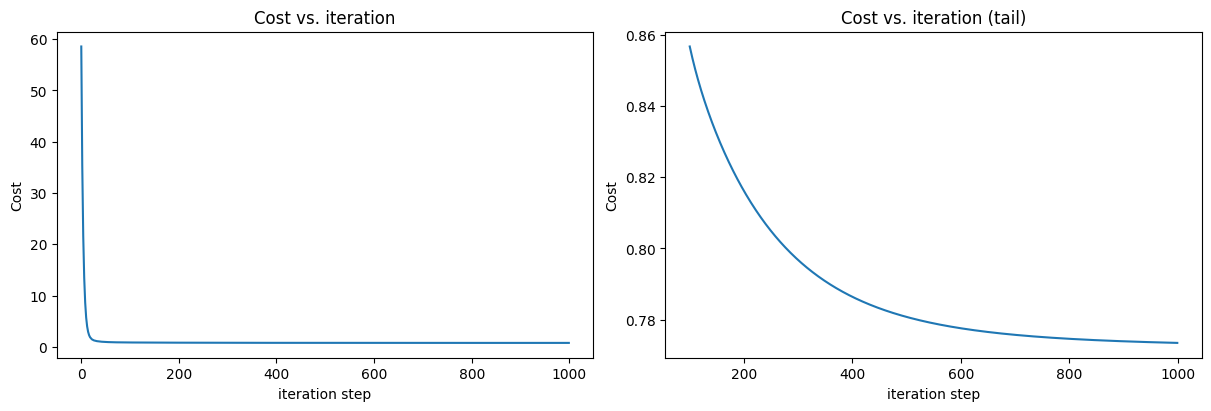

In [206]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

### Feature Scaling

i will use feature scaling/normalization to further improve the model. one way of doing this is z-score normalization, as seen below:

$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{6}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{7}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{8}
\end{align}
$$

In [207]:
def z_score(X): # finding the mean (mu) + standard deviation (sigma) and normalizing the features
    # finding the mean of each column/feature
    mu = np.mean(X, axis=0)

    # finding the standard deviation of each column/feature
    sigma = np.std(X, axis=0)
    
    X_mean = (X - mu)
    X_norm = (X - mu)/sigma      

    return X_norm # returning the normalized features

In [211]:
# now i'm going to run gradient descent with the normalized features

X_norm = z_score(X)

# settings for gradient descent
iterations = 1000
learning_rate = .1

w_final, b_final, J_hist = gradient_descent(X_norm, y, initial_w, initial_b,
                                                    cost_function, compute_params, 
                                                    learning_rate, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X.shape
preds = []
for i in range(m):
    preds.append(np.dot(X[i], w_final) + b_final)
    print(f"prediction: {np.dot(X[i], w_final) + b_final:0.2f}, target value: {y[i]}")


Iteration    0: Cost    74.30   
Iteration  100: Cost    71.66   
Iteration  200: Cost    71.65   
Iteration  300: Cost    71.65   
Iteration  400: Cost    71.65   
Iteration  500: Cost    71.65   
Iteration  600: Cost    71.65   
Iteration  700: Cost    71.65   
Iteration  800: Cost    71.65   
Iteration  900: Cost    71.65   
b,w found by gradient descent: 11.91,[ 0.05045897 -0.03796363  0.04819186  0.06349915  0.05513921 -0.13375735
 -0.04388668 -0.04543149 -0.00702103 -0.07293873 -0.01986456 -0.06443117
  0.38138867  2.56099525] 
prediction: 40.64, target value: 11
prediction: 43.89, target value: 11
prediction: 49.99, target value: 12
prediction: 53.38, target value: 14
prediction: 49.65, target value: 13
prediction: 47.34, target value: 13
prediction: 47.93, target value: 13
prediction: 49.74, target value: 13
prediction: 59.08, target value: 17
prediction: 47.36, target value: 13
prediction: 53.54, target value: 14
prediction: 46.86, target value: 13
prediction: 49.90, target va

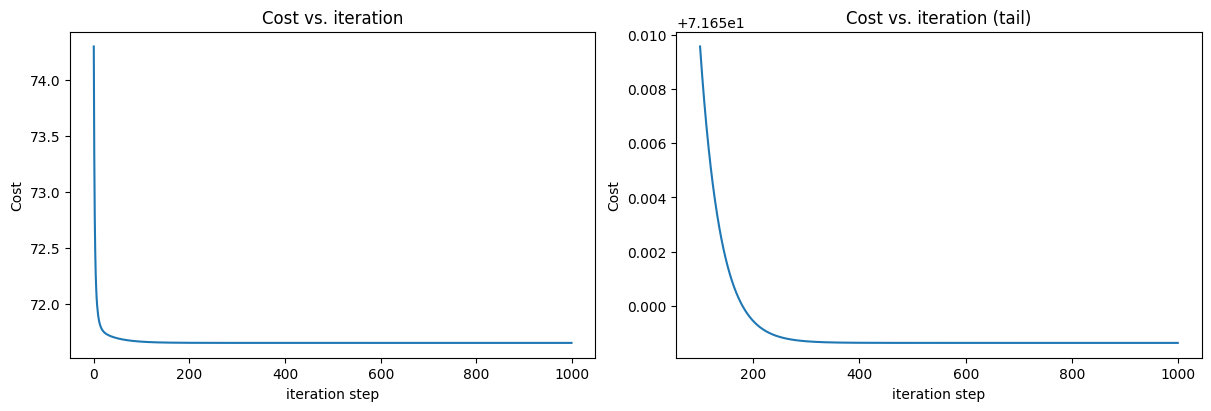

In [209]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

ironically, the features that weren't normalized yielded better results than those that were... 
something i'll look into more later (i've tried adjusting everything lol)

now i'll try and gain insight to how accurate this model is with scikit-learn

In [221]:
# getting the mae of the 1st model

y_pred = np.array(preds1)
y_true = np.array(y)

print(y_pred, y_true)

mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae) # ~0.771 !!

[ 9.83139408 11.09875124 13.17654093 14.46838167 13.05494139 12.23383975
 12.55016787 13.30721615 16.490657   12.24302998 14.54618475 12.22925155
 13.10323238 12.3578937  14.43286491 17.5031505  13.66110677 14.40052288
  7.48433954 12.36445286 13.32779235 12.04580005 13.03118892 10.1442368
 11.27542043 11.21988383 12.13976423 11.35989095 12.36370092 11.09971288
 10.88684082 15.48900098 14.10185283 12.60706573 12.18312286 11.27760379
 14.37934076 13.53124403 12.27420262 13.60247617 11.49661012 10.88422226
 15.25852196 10.17792696 11.00233022 11.14646916 12.6011534  17.78138604
 12.02757408 12.53794771 13.59980635 14.63403499  9.01562106 12.35719551
 12.33024739 13.29283908 14.71237967 15.50480842 13.5365148  15.58302683
 16.57737227  9.93494267 13.54750235 13.47023705 12.42050408 15.77991009
 12.15677906  9.46780621 10.59612358 15.4608709  11.7659118   9.75669668
 11.49876579 13.14449964 11.20520503 11.17179312 11.68813562 13.56552514
  8.84609227 11.61726583 11.4140133   9.44833092 11.

not too bad for a first try! definitely struggled a little (and lowk got help), but it was worth it. linear regression is fun. 😎

time: exactly 2 hrs (12:01 - 2:01 AM) 😮

now i have to organize this 😔